<a href="https://colab.research.google.com/github/Hamidkn/PyhtonExampleCodes/blob/main/MPCExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPC example codes

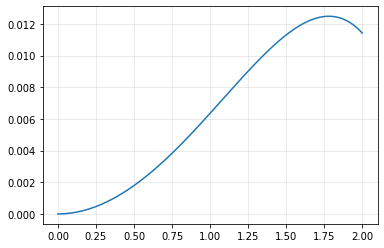

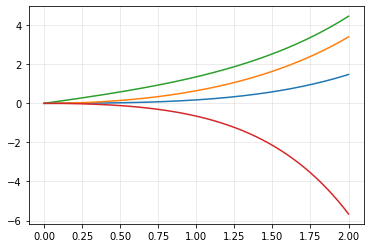

In [ ]:
from scipy.signal import StateSpace, lsim
import numpy as np
import matplotlib.pyplot as plt

# initialize system's parameters
R=100
L=1.3e-3
# k = 100 # Nm/A
# r = 0.5 # m
m = 0.0375 # kg
V = 18

# state matrix
A = np.asarray([[-0.25, 0.82, 0, 0],
               [-0.38, 0.17, 1.02, 0],
               [0.35 , 0.81, 0.14, 0.01],
                [-0.61, -0.38, -0.61, 0.93]])

# input matrix
B = np.asarray([[0.19, 0.02],
               [-0.39, 0],
               [-0.78, 1.09],
                [0.45, 0]])

# output-matrix
C = np.asarray([[0, 0.02, 0, 0.01]])

# feedforward matrix
D = np.asarray([[0, 0]])

micro = StateSpace(A, B, C, D)

# print(micro)

# define simulation steps in time
t = np.arange(0, 2, 1e-5)

# initialize input signal
U = np.zeros((t.shape[0], 2))
U[:, 1] = 1 # "enable" gravitation
U[:, 0] = 0 # set u(t) to 0
# U = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

# simulate the system
_, y, s = lsim(micro, U, t)
# we won't use y, since y=s[:, 0]

plt.plot(t,y)
plt.grid(alpha=0.3)
plt.show()

plt.plot(t,s)
plt.grid(alpha=0.3)
plt.show()

# Using Recurrent NNs and Keras to Reproduce the Input-Output Behaviour of a State-Space Model of a Dynamical System

Text(0.5, 1.0, 'System step response')

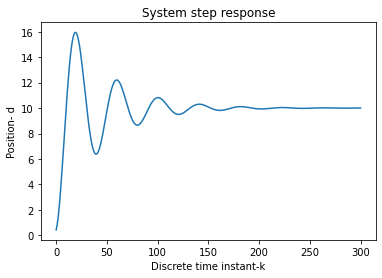

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the continuous-time system matrices

A = np.asarray([[-0.25, 0.82, 0, 0],
               [-0.38, 0.17, 1.02, 0],
               [0.35 , 0.81, 0.14, 0.01],
                [-0.61, -0.38, -0.61, 0.93]])

# input matrix
B = np.asarray([[0.19, 0.02],
               [-0.39, 0],
               [-0.78, 1.09],
                [0.45, 0]])

# output-matrix
C = np.asarray([[0, 0.02, 0, 0.01]])

# feedforward matrix
D = np.asarray([[0, 0]])

#define the number of time-samples used for the simulation and the sampling time for the discretization
t = np.arange(0, 200, 0.5)

# initialize input signal
U = np.zeros((t.shape[0], 2))
sampling=0.5

#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input_seq=np.ones(time)
#plt.plot(input_sequence)


# the following function simulates the state-space model using the backward Euler method
# the input parameters are:
#    -- A,B,C              - continuous time system matrices 
#    -- initial_state      - the initial state of the system 
#    -- time_steps         - the total number of simulation time steps 
#    -- sampling_perios    - the sampling period for the backward Euler discretization 
# this function returns the state sequence and the output sequence
# they are stored in the vectors Xd and Yd respectively
def simulate(A,B,C,initial_state,input_sequence, time_steps,sampling_period):
    from numpy.linalg import inv
    I=np.identity(A.shape[0]) # this is an identity matrix
    Ad=inv(I-sampling_period*A)
    Bd=Ad*sampling_period*B
    Xd=np.zeros(shape=(A.shape[0],time_steps+1))
    Yd=np.zeros(shape=(C.shape[0],time_steps+1))
    
    for i in range(0,time_steps):
       if i==0:
           Xd[:,[i]]=initial_state
           Yd[:,[i]]=C*initial_state
           x=Ad*initial_state+Bd*input_sequence[i]
       else:
           Xd[:,[i]]=x
           Yd[:,[i]]=C*x
           x=Ad*x+Bd*input_sequence[i]
    Xd[:,[-1]]=x
    Yd[:,[-1]]=C*x
    return Xd, Yd
    
state,output=simulate(A,B,C,x0,input_seq, time ,sampling)    


plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')